In [64]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [65]:
from urllib.request import urlretrieve

In [66]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x12b313520>)

In [67]:
!pip install pandas --quiet

In [68]:
import pandas as pd

In [69]:
medical_df = pd.read_csv('medical.csv')

In [70]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [71]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [73]:
!pip install plotly matplotlib seaborn --quiet

In [74]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [76]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [77]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

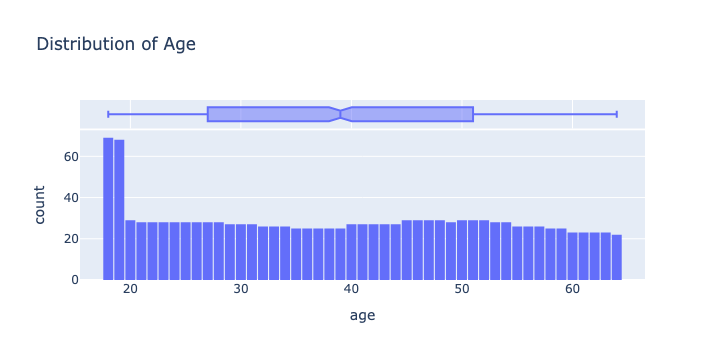

In [78]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [79]:
mean_age = medical_df['age'].mean()

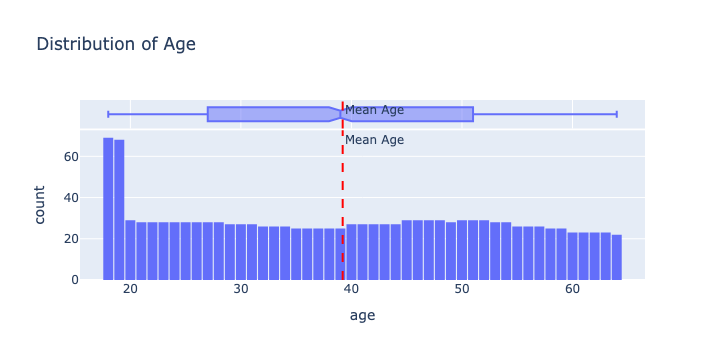

In [80]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.add_vline(x=mean_age, line_dash="dash",
                   line_color="red",
                   annotation_text="Mean Age")
fig.update_layout(bargap=0.1)
fig.show()


In [81]:
print(mean_age)

39.20702541106129


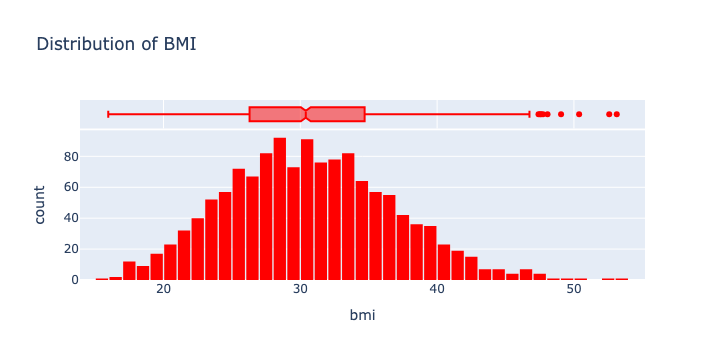

In [82]:
fig = px.histogram(medical_df,
                  x='bmi',
                  marginal='box',
                  color_discrete_sequence=['red'],
                  title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

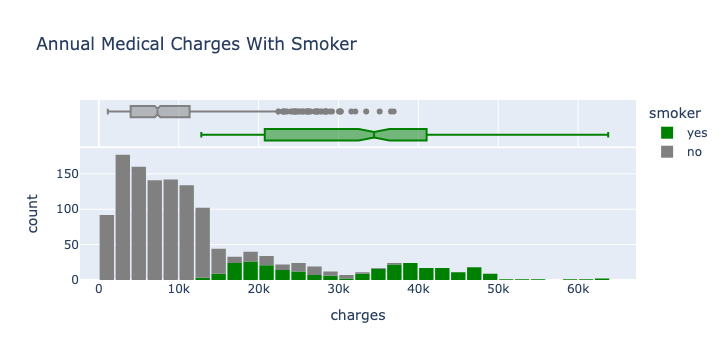

In [83]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='smoker',
                  color_discrete_sequence=['green','grey'],
                  title='Annual Medical Charges With Smoker')
fig.update_layout(bargap=0.1)
fig.show()

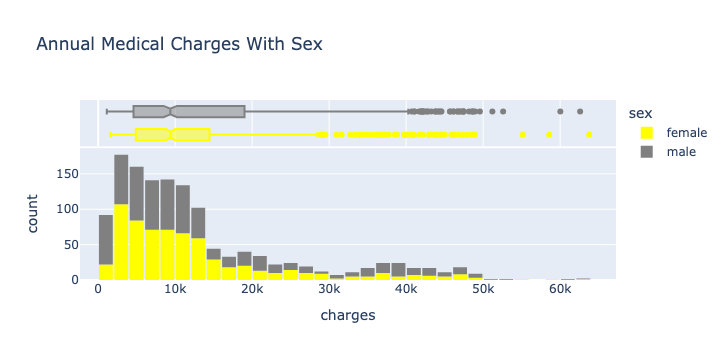

In [84]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='sex',
                  color_discrete_sequence=['yellow','grey'],
                  title='Annual Medical Charges With Sex')
fig.update_layout(bargap=0.1)
fig.show()

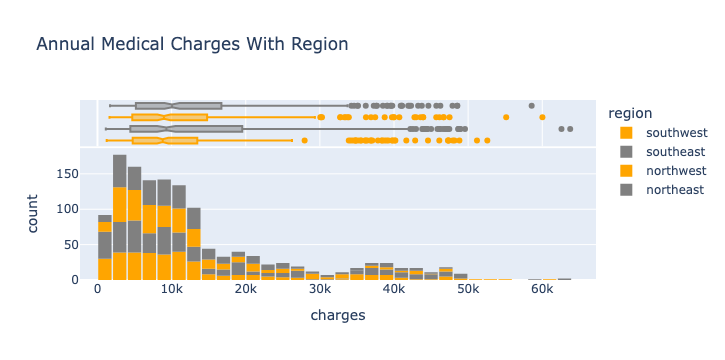

In [85]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='region',
                  color_discrete_sequence=['orange','grey'],
                  title='Annual Medical Charges With Region')
fig.update_layout(bargap=0.1)
fig.show()

In [86]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

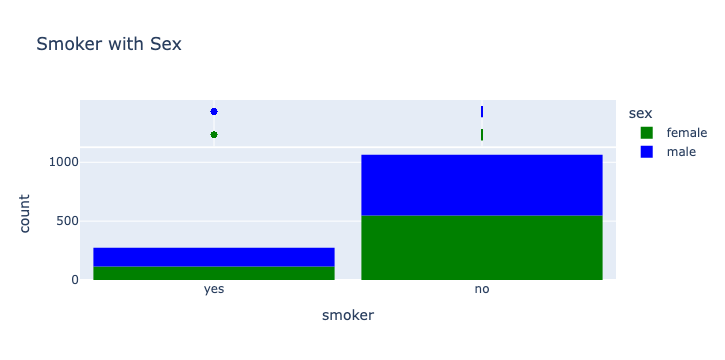

In [87]:
fig = px.histogram(medical_df,
                  x='smoker',
                  marginal='box',
                  color='sex',
                  color_discrete_sequence=['green','blue'],
                  title='Smoker with Sex')
fig.update_layout(bargap=0.1)
fig.show()

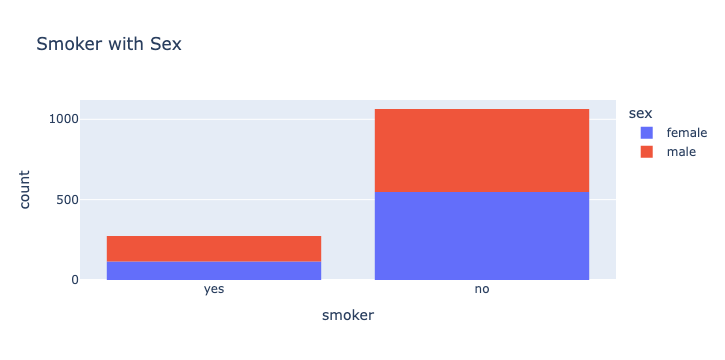

In [88]:
px.histogram(medical_df,
            x='smoker',
            color='sex',
            title='Smoker with Sex')

In [89]:
medical_df.groupby('sex')['smoker'].value_counts(normalize=True)

sex     smoker
female  no        0.826284
        yes       0.173716
male    no        0.764793
        yes       0.235207
Name: proportion, dtype: float64

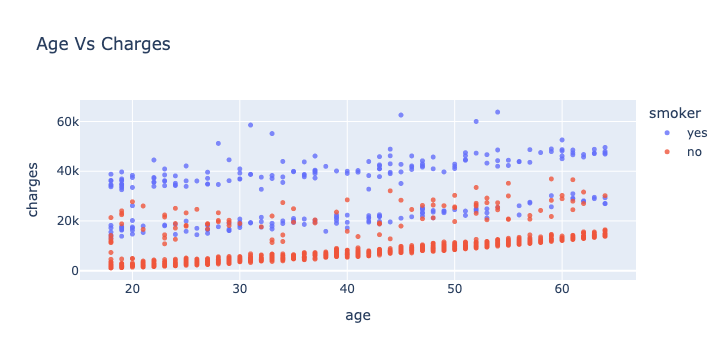

In [90]:
fig = px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='Age Vs Charges')
fig.update_traces(marker_size=5)
fig.show()

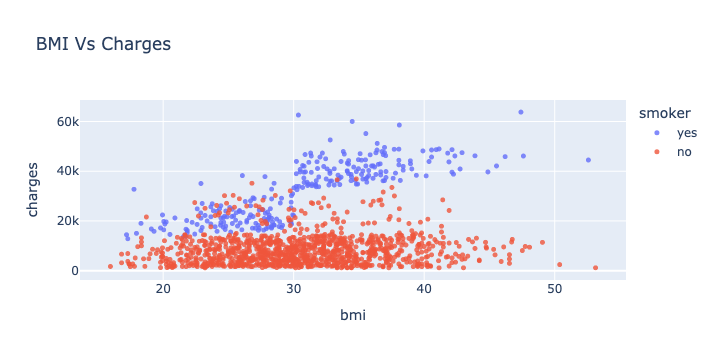

In [91]:
fig = px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI Vs Charges')
fig.update_traces(marker_size=5)
fig.show()

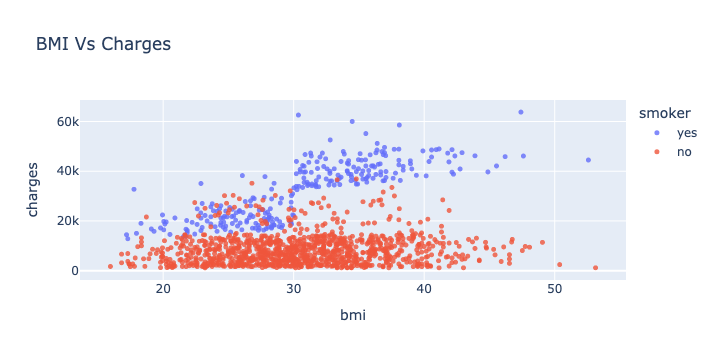

In [92]:
fig = px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI Vs Charges')
fig.update_traces(marker_size=5)
fig.show()

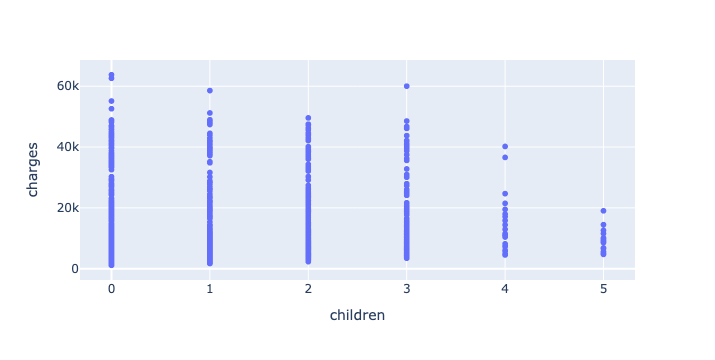

In [93]:
fig = px.scatter(medical_df,
                x='children',
                y='charges')
fig.show()

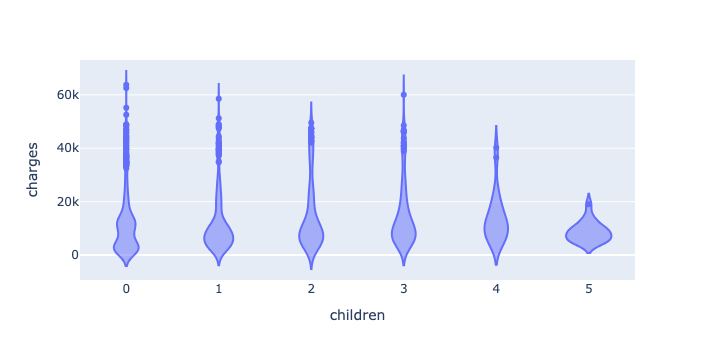

In [94]:
fig = px.violin(medical_df,
                x='children',
                y='charges')
fig.show()

In [95]:
fig = px.violin(medical_df,
                x='children',
                y='charges',
                box=True,
                points='outliers',
                color='smoker')
fig.show()

In [96]:
medical_df.charges.corr(medical_df.age)

np.float64(0.29900819333064754)

In [97]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362884)

In [98]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984772)

In [101]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


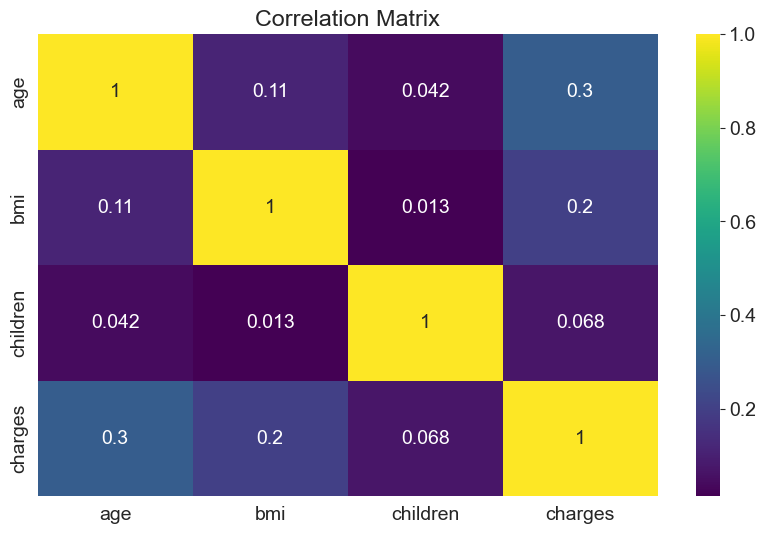

In [106]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='viridis', annot=True)
plt.title('Correlation Matrix');